<a href="https://colab.research.google.com/github/pramodpachpule/loan-status-prediction/blob/main/loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

Loading data from csv file and perform EDA

In [2]:
data = pd.read_csv('/content/loan_prediction.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

data visualization

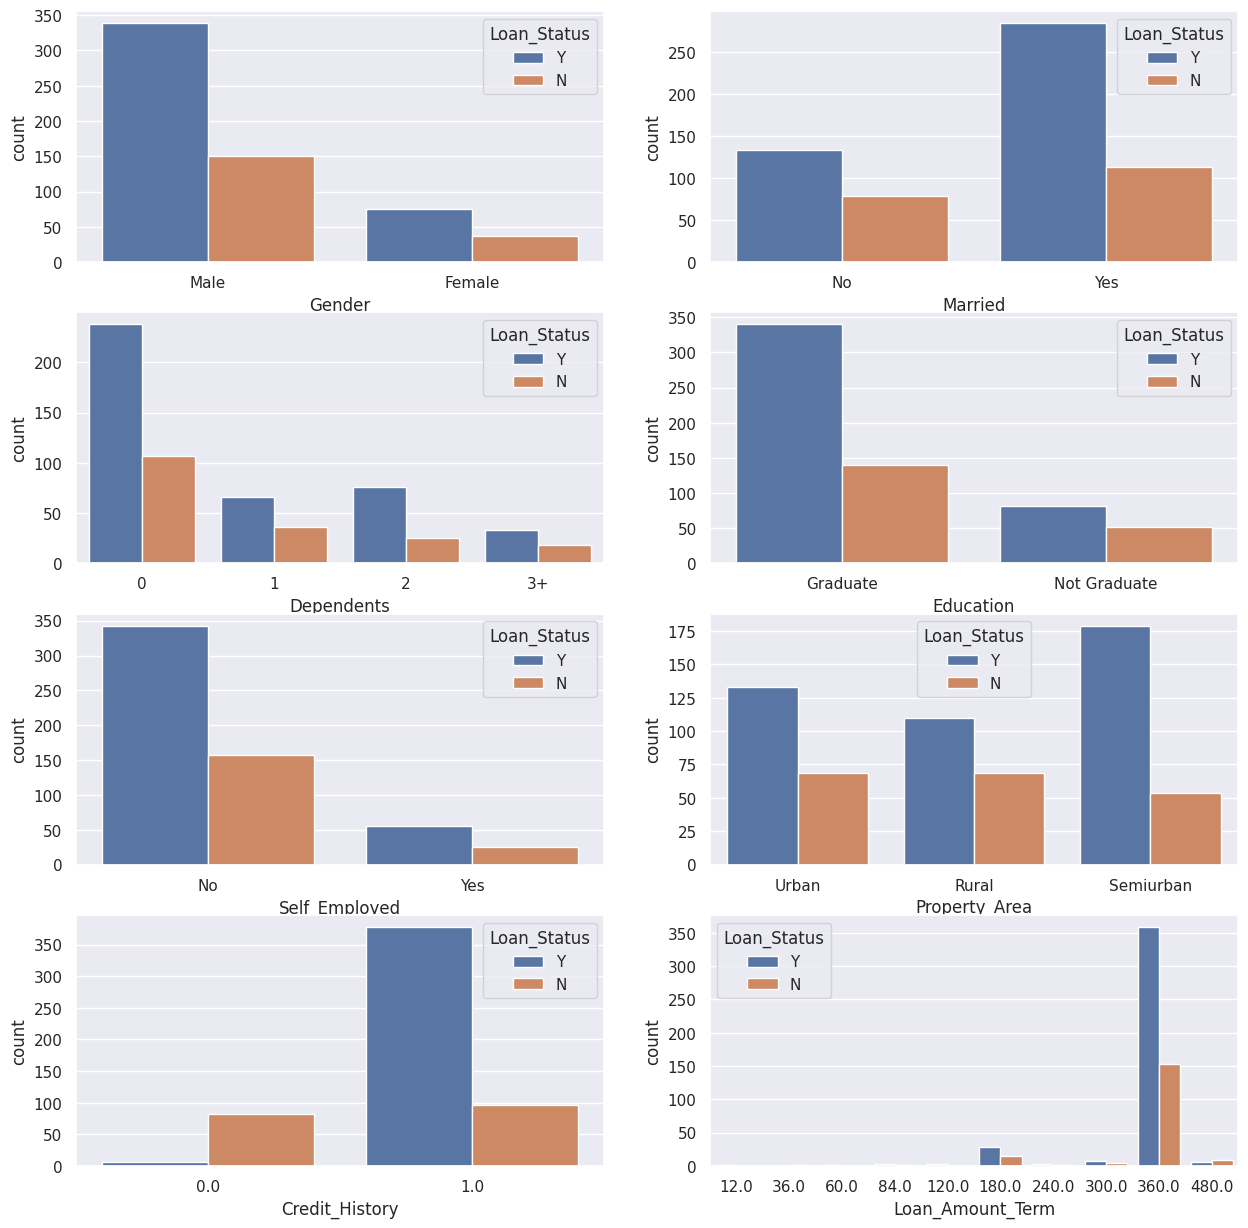

In [9]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,15))
for i in range(len(categorical_columns)):
  plt.subplot(4,2,i+1)
  sns.countplot(data= data , x = categorical_columns[i],hue='Loan_Status')
plt.show()

In [10]:
len(categorical_columns)

8

Cheacking categorical column value count

In [11]:
for i in categorical_columns:
  count = data[i].value_counts()
  print("****************************")
  print(i)
  print(count)

****************************
Gender
Male      489
Female    112
Name: Gender, dtype: int64
****************************
Married
Yes    398
No     213
Name: Married, dtype: int64
****************************
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
****************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
****************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
****************************
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
****************************
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
****************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


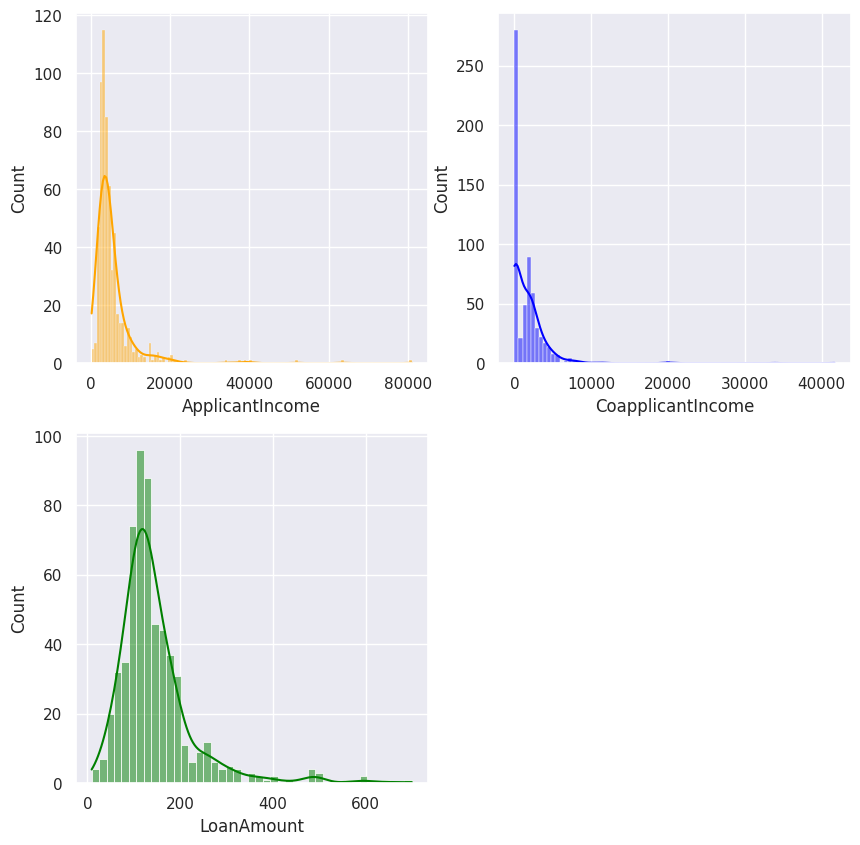

In [12]:
sns.set(style="darkgrid")
col = ['orange','blue','green']
plt.figure(figsize=(10,10))
for i in range(len(numerical_columns)):
  plt.subplot(2,2,i+1)
  sns.histplot(data = data, x = numerical_columns[i],kde=True, color=col[i])
plt.show()

<ipython-input-13-8b0ab8e879c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='inferno');


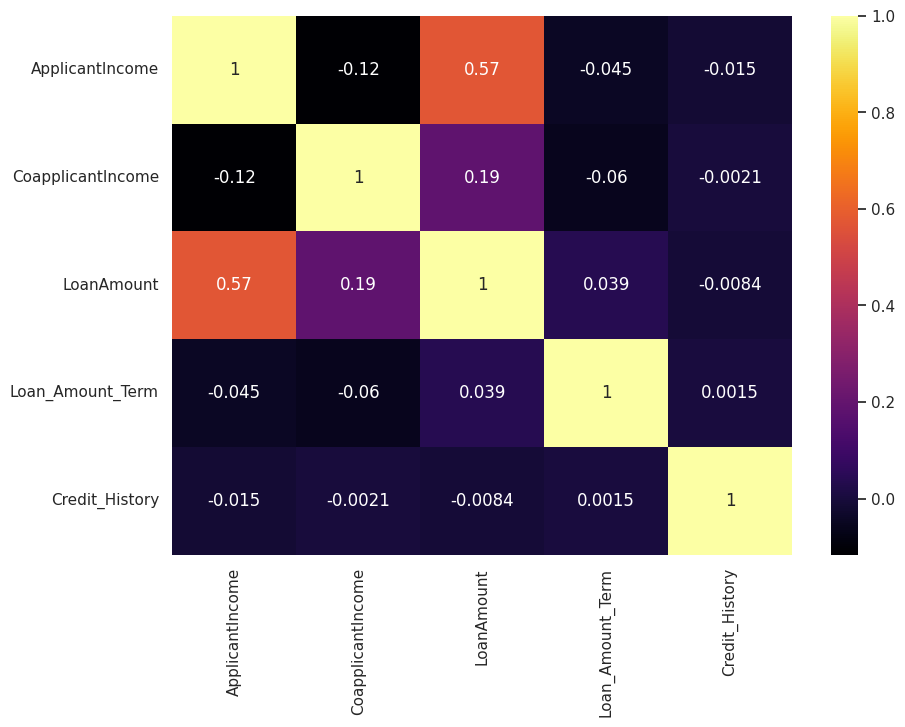

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, cmap='inferno');

Data imputation

In [14]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(),inplace=True)
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
data.replace({'Gender':{'Male':1,'Female':0}, 'Married':{'Yes':1,'No':0}, 'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Urban':1 ,'Semiurban':2}, 'Loan_Status':{'N':0,'Y':1} },inplace=True)

In [17]:
data = data.replace(to_replace='3+', value=4)

In [18]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


In [19]:
X=data.drop(columns=['Loan_ID','Loan_Status'])
Y = data['Loan_Status']

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [21]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(614, 11)
(491, 11)
(123, 11)


In [22]:
classifier = LogisticRegression( max_iter=500, random_state=1)
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))
print('LR accuracy: {:.2f}%'.format(accuracy_score(Y_pred,Y_test)*100))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

[[18 25]
 [ 1 79]]
LR accuracy: 78.86%


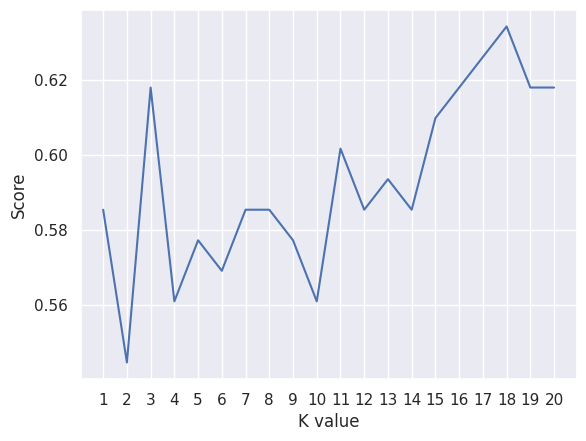

KNN best accuracy: 63.41%


In [23]:
scores = []
for i in range(1,21):
    KNNmodel = KNeighborsClassifier(n_neighbors = i)
    KNNmodel.fit(X_train, Y_train)
    scores.append(accuracy_score(KNNmodel.predict(X_test), Y_test))

plt.plot(range(1,21), scores)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scores)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

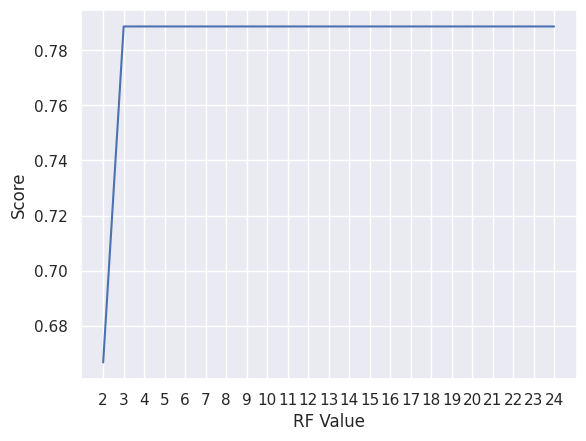

Random Forest Accuracy:  78.86%


In [24]:
scoreListRF = []
for i in range(2,25):
    RFmodel = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFmodel.fit(X_train, Y_train)
    scoreListRF.append(RFmodel.score(X_test, Y_test))

plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
print("Random Forest Accuracy:  {:.2f}%".format( max(scoreListRF)*100))